Using Rodriguez+17 corrections to the scalign relations can reduce radius by 10%. What impact will this have on our inferred clump magnitudes?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_palette('colorblind')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes',labelsize=20) 

import os
import sys
sys.path.append(os.path.expanduser('~')+'/PhD/Hacks_and_Mocks/asfgrid/')
import asfgrid

from omnitool import scalings
from omnitool.literature_values import *

__outdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/Output/'
__datdir__ = os.path.expanduser('~')+'/PhD/Gaia_Project/data/KepxDR2/'

In [2]:
df = pd.read_csv(__datdir__+'rcxyu18.csv')

In [3]:
asf = asfgrid.Seism()
evstate = np.ones(len(df))*2
logz = np.log10(df.Z.values)
teff = df.Teff.values
dnu = df.dnu.values
numax = df.numax.values

mass, radius = asf.get_mass_radius(evstate, logz, teff, dnu, numax)
logg = asf.mr2logg(mass, radius)
fdnu = asf._get_fdnu(evstate, logz, teff, mass, logg, fill_value='nearest')



('outside interp range', 76, ' out of ', 5576)
('outside interp range', 361, ' out of ', 5576)


In [4]:
SC = scalings(df.numax, df.dnu, df.Teff,
            _numax_err = df.numax_err, _dnu_err = df.dnu_err, _Teff_err = df.Teff_err)
SC.give_corrections(fdnu = fdnu)
Rss = SC.get_radius()   #Radii using Sharma + Stello
Rrr = Rss * 0.95 #`radii' from Rodriguez et al.

You have passed corrections to the Delta Nu scaling relation


/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


/home/oliver/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


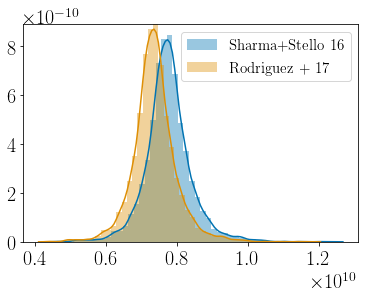

In [5]:
sns.distplot(Rss, label='Sharma+Stello 16')
sns.distplot(Rrr, label='Rodriguez + 17')
plt.legend(fontsize=15)

In [6]:
Lss = 4 * np.pi * stefboltz * Rss**2 * df.Teff**4
Lrr = 4 * np.pi * stefboltz * Rrr**2 * df.Teff**4

In [7]:
Mbolss = -2.5 * np.log10(Lss / Lsol) + Mbolsol
Mbolrr = -2.5 * np.log10(Lrr / Lsol) + Mbolsol

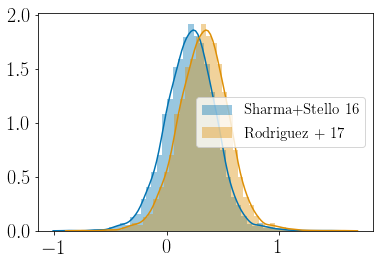

In [8]:
sns.distplot(Mbolss, label='Sharma+Stello 16')
sns.distplot(Mbolrr, label='Rodriguez + 17')
plt.legend(fontsize=15)

In [9]:
bcs_yu = pd.read_csv('/home/oliver/PhD/Gaia_Project/data/KepxDR2/BCs/Logg_perturbed/casagrande_bcs_0.0.csv')
df = pd.merge(df, bcs_yu, how='left', on='KICID')

Mkss = Mbolss - df['BC_K']
Mkrr = Mbolrr - df['BC_K']

-1.747521322662009
-1.6361393491062484


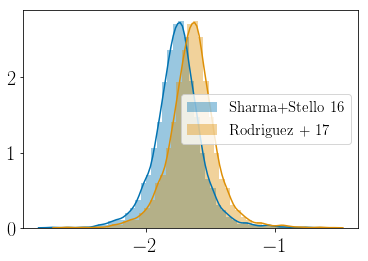

In [10]:
sns.distplot(Mkss, label='Sharma+Stello 16')
sns.distplot(Mkrr, label='Rodriguez + 17')
plt.legend(fontsize=15)
print(np.median(Mkss))
print(np.median(Mkrr))

0.2555500587198619
0.366932032275623


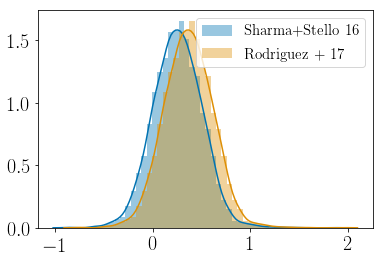

In [11]:
Mkss = Mbolss - df['BC_GAIA']
Mkrr = Mbolrr - df['BC_GAIA']
sns.distplot(Mkss, label='Sharma+Stello 16')
sns.distplot(Mkrr, label='Rodriguez + 17')
plt.legend(fontsize=15)
print(np.median(Mkss))
print(np.median(Mkrr))

In [12]:
m = [-43.79, -38.38]
np.mean(m)

-41.085